# 1ª PARTE: importações e contextualização 

In [96]:
# importações

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.dates as mdates
import locale

In [97]:
# descrição dos dados: dados da estação metereológica da Ilha do Mel no Paraná.
# período dos dados: 1 ano (30/09/2007 a 29/09/2017)

# 2ª PARTE: tratamento dos dados

In [98]:
# abertura do arquivo

df = pd.read_csv(r"C:\Users\seren\Downloads\csv_python.csv")
df.head()

,datas,UTC,T Inst,T Max,T Min,U Inst,U Max,U Min,PO Inst,PO Max,PO Min,P Inst,P Max,P Min,V Vel,V Dir,V Raj,Rad,precip
0,9/30/2016,0,18.1,18.1,17.9,85,85,84,15.5,15.5,15.3,1018.8,1018.8,1018.5,0.5,217,2.3,-3.52,0
1,9/30/2016,1,18.5,18.6,18.1,86,86,85,16.1,16.2,15.6,1018.9,1019,1018.8,1.7,247,3.6,-2.13,0
2,9/30/2016,2,17.9,18.5,17.8,92,92,86,16.6,16.6,16.1,1018.8,1019,1018.8,2.9,246,6.3,-3,0.4
3,9/30/2016,3,17.9,17.9,17.8,92,92,91,16.4,16.6,16.4,1018.4,1018.9,1018.4,3.2,242,8.4,-2.1,0
4,9/30/2016,4,18.0,18,17.8,87,92,87,15.9,16.5,15.8,1018.1,1018.4,1018.1,2.8,232,10.2,-1.01,0


In [99]:
# Retirada das colunas 'datas' e 'UTC' e transformação para DATETIME

df['DATETIME'] = pd.to_datetime(df['datas'].astype(str) + ' ' + df['UTC'].astype(str) + ':00')
df.set_index('DATETIME', inplace=True)
df = df.drop(columns=['datas', 'UTC'])
print(df.head())

                     T Inst T Max T Min  U Inst U Max U Min  PO Inst PO Max  \
DATETIME                                                                      
2016-09-30 00:00:00    18.1  18.1  17.9      85    85    84     15.5   15.5   
2016-09-30 01:00:00    18.5  18.6  18.1      86    86    85     16.1   16.2   
2016-09-30 02:00:00    17.9  18.5  17.8      92    92    86     16.6   16.6   
2016-09-30 03:00:00    17.9  17.9  17.8      92    92    91     16.4   16.6   
2016-09-30 04:00:00    18.0    18  17.8      87    92    87     15.9   16.5   

                    PO Min  P Inst   P Max   P Min V Vel V Dir V Raj    Rad  \
DATETIME                                                                      
2016-09-30 00:00:00   15.3  1018.8  1018.8  1018.5   0.5   217   2.3  -3.52   
2016-09-30 01:00:00   15.6  1018.9    1019  1018.8   1.7   247   3.6  -2.13   
2016-09-30 02:00:00   16.1  1018.8    1019  1018.8   2.9   246   6.3     -3   
2016-09-30 03:00:00   16.4  1018.4  1018.9  1018.4 

In [100]:
# Converter todas as colunas para numérico (ignora erros, substitui por NaN (valor nulo numérico))

df = df.apply(pd.to_numeric, errors='coerce')
print(df.dtypes)

T Inst     float64
T Max      float64
T Min      float64
U Inst       int64
U Max      float64
U Min      float64
PO Inst    float64
PO Max     float64
PO Min     float64
P Inst     float64
P Max      float64
P Min      float64
V Vel      float64
V Dir      float64
V Raj      float64
Rad        float64
precip     float64
dtype: object


# 3ª PARTE: estatística

In [101]:
# Resumo estatístico

df.describe()

,T Inst,T Max,T Min,U Inst,U Max,U Min,PO Inst,PO Max,PO Min,P Inst,P Max,P Min,V Vel,V Dir,V Raj,Rad,precip
count,6933.000000,6917.000000,6917.000000,6933.000000,6917.000000,6917.000000,6933.000000,6917.000000,6917.000000,6933.000000,6917.000000,6917.000000,6928.000000,6928.000000,6911.000000,6789.000000,6189.000000
mean,21.920366,22.344268,21.509932,84.946776,86.948243,82.772734,19.148132,19.579991,18.717450,1016.965325,1017.230056,1016.699870,2.434815,183.754186,5.038706,673.148911,0.274164
std,3.862197,3.912019,3.824303,9.609044,8.435269,10.732719,3.400364,3.369905,3.440216,5.567435,5.533245,5.604846,1.665469,98.351975,2.564493,1023.238068,1.840530
min,6.100000,6.600000,6.000000,36.000000,44.000000,31.000000,1.000000,3.800000,0.300000,1001.200000,1001.800000,1000.900000,0.000000,1.000000,0.000000,-3.540000,0.000000
25%,19.200000,19.600000,18.900000,78.000000,81.000000,76.000000,17.000000,17.400000,16.600000,1012.800000,1013.000000,1012.400000,1.300000,109.000000,3.100000,-3.190000,0.000000
50%,21.600000,21.900000,21.200000,87.000000,89.000000,85.000000,19.000000,19.400000,18.700000,1016.900000,1017.100000,1016.700000,2.100000,181.000000,4.700000,44.380000,0.000000
75%,24.700000,25.200000,24.300000,93.000000,94.000000,92.000000,22.100000,22.500000,21.600000,1020.800000,1021.100000,1020.600000,3.200000,267.000000,6.400000,1062.000000,0.000000
max,33.300000,34.000000,32.000000,97.000000,97.000000,97.000000,26.800000,27.100000,26.600000,1033.000000,1033.100000,1032.900000,14.400000,360.000000,35.700000,4269.000000,60.400000


### Estatística univariada: Precipitação

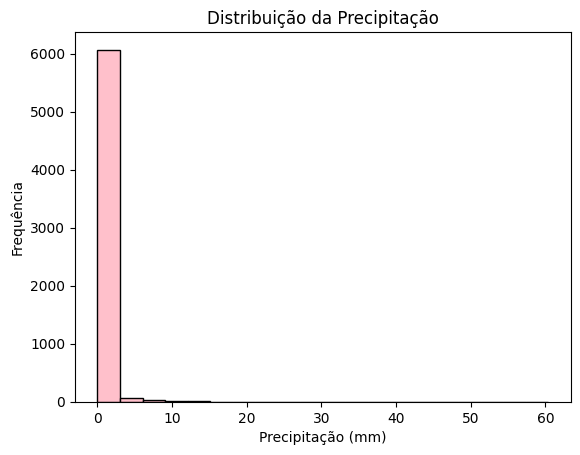

In [117]:
# ---------------------------Histograma-------------------------------------
# Histograma e tamanho da figura
df['precip'].plot(kind='hist', bins=20, color='pink', edgecolor='black')

# Títulos e rótulos
plt.xlabel('Precipitação (mm)')       # eixo X
plt.ylabel('Frequência')               # eixo Y
plt.title('Distribuição da Precipitação')  # título do gráfico

# Salvar figura
plt.savefig(r"C:\Users\seren\OneDrive\One_drive_serena\SERENA\01. MESTRADO\09. DISCIPLINAS MESTRADO\.UFSC\Python\python_env_app\Histograma_precipitação.png",
            dpi=300, bbox_inches='tight')  # dpi=300 → alta resolução, bbox_inches='tight' → sem cortar

# Visualizar
plt.show()

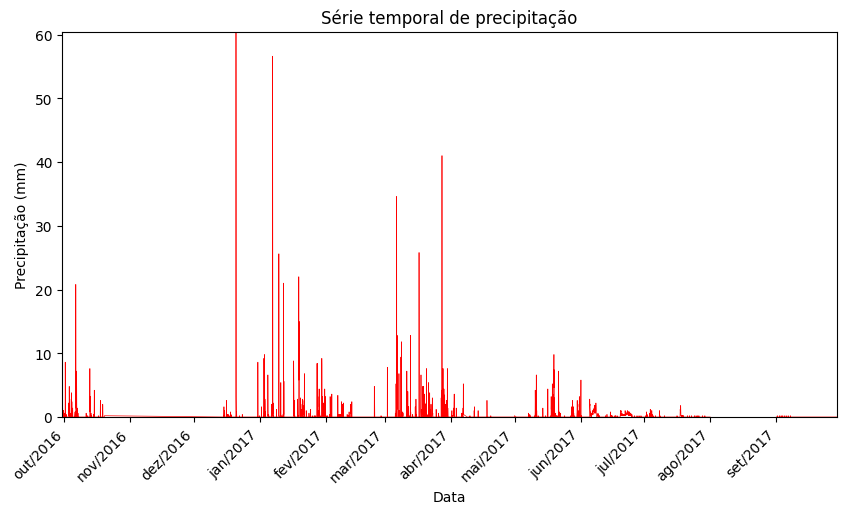

In [119]:
# --------------------------- Série temporal-------------------------------------

# variável
variavel = 'precip'

# criar figura e eixo, tamanho da figura: largura=10, altura=5
fig, ax = plt.subplots(figsize=(10,5))

# Série temporal
ax.plot(df.index, df[variavel], linewidth=0.5, color='red')
ax.set_xlim([df.index.min(), df.index.max()])
ax.set_ylim([df[variavel].min(), df[variavel].max()])

# Títulos e rótulos
ax.set_ylabel('Precipitação (mm)')
ax.set_xlabel('Data')
ax.set_title(f'Série temporal de precipitação')

# Configurar o locale para português do Brasil
locale.setlocale(locale.LC_TIME, 'portuguese')

# Formatar o eixo x com meses abreviados em português
ax.xaxis.set_major_locator(mdates.MonthLocator())  # marca cada mês
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))  # ex: out/2017

# Rotacionar labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Salvar figura
fig.savefig(r"C:\Users\seren\OneDrive\One_drive_serena\SERENA\01. MESTRADO\09. DISCIPLINAS MESTRADO\.UFSC\Python\python_env_app" + f'/Série_temporal_precipitação.png',
            dpi=300, bbox_inches='tight')

# Visualizar
plt.show()

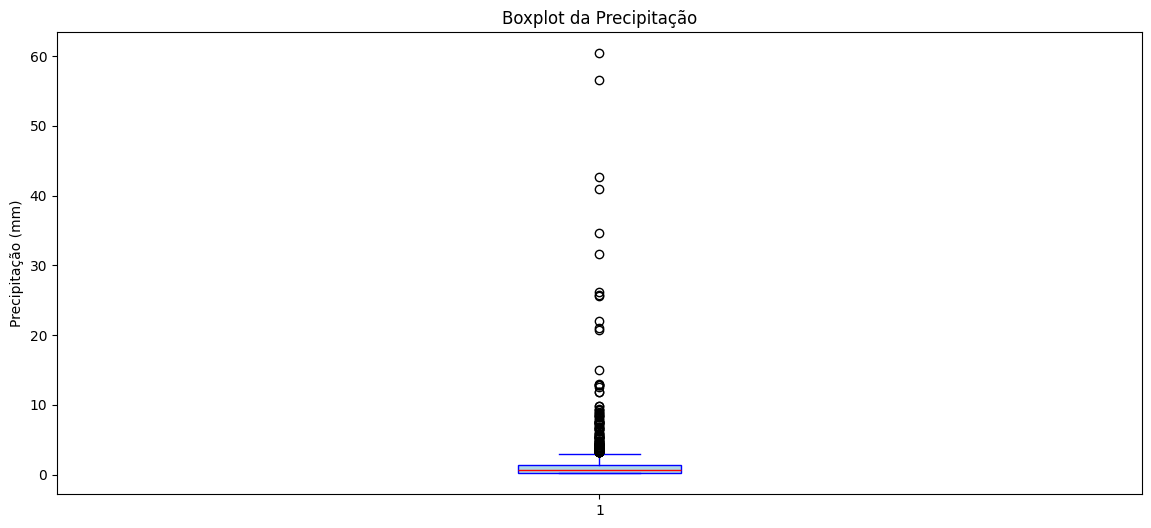

In [104]:
# --------------------------- Box-------------------------------------

# Selecionar valores válidos
precip = df['precip'][df['precip'] > 0]  # remove zeros

# Tamanho da figura
plt.figure(figsize=(14,6))  # largura=10, altura=6 (pode aumentar)

# Boxplot
plt.boxplot(precip, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'))

# Títulos e rótulos
plt.ylabel('Precipitação (mm)')
plt.title('Boxplot da Precipitação')

# Salvar figura
plt.savefig(r"C:\Users\seren\OneDrive\One_drive_serena\SERENA\01. MESTRADO\09. DISCIPLINAS MESTRADO\.UFSC\Python\python_env_app\boxplot_precipitação.png",
            dpi=300, bbox_inches='tight')  # dpi=300 → alta resolução, bbox_inches='tight' → sem cortar

# Visualizar
plt.show()

In [105]:
# ---------------------------Estatística univariada: Valores descritivos-------------------------------------
df['precip'].describe()

count    6189.000000
mean        0.274164
std         1.840530
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        60.400000
Name: precip, dtype: float64

### Estatística bivariada: Precipitação x Temperatura

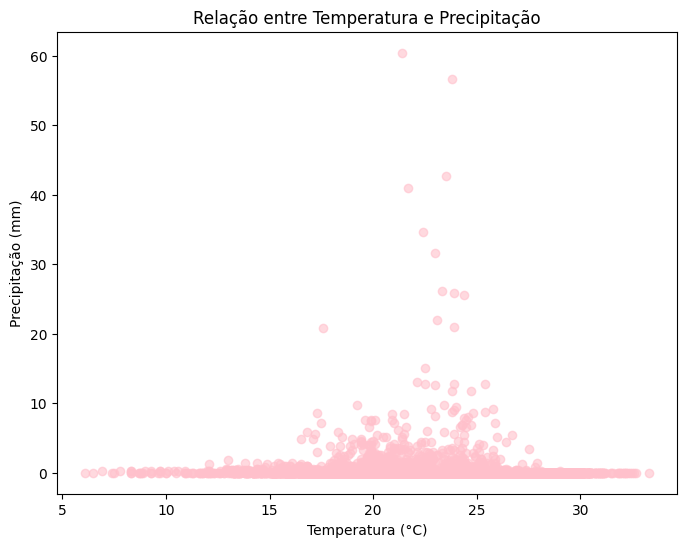

In [120]:
#-----------------Scatter plot para visualizar relação----------------------------

# Scatter plot e tamanho da figura
plt.figure(figsize=(8,6))
plt.scatter(df['T Inst'], df['precip'], color='pink', alpha=0.6)

# Títulos e rótulos
plt.xlabel('Temperatura (°C)')
plt.ylabel('Precipitação (mm)')
plt.title('Relação entre Temperatura e Precipitação')

# Salvar figura
plt.savefig(r"C:\Users\seren\OneDrive\One_drive_serena\SERENA\01. MESTRADO\09. DISCIPLINAS MESTRADO\.UFSC\Python\python_env_app\Relação_temperatura_precipitação.png",
            dpi=300, bbox_inches='tight')  # dpi=300 → alta resolução, bbox_inches='tight' → sem cortar

# Visualizar
plt.show()

In [107]:
#-----------------------------Correlação de Pearson----------------------------------------------------
correlacao = df['T Inst'].corr(df['precip'])
print(f'Correlação entre T Inst e precipitação: {correlacao:.2f}')

# Análise: quando a temperatura aumenta, a precipitação tende a diminuir, e vice-versa. O valor está próximo de 0, ou seja, é uma correlação fraca.

Correlação entre T Inst e precipitação: -0.02


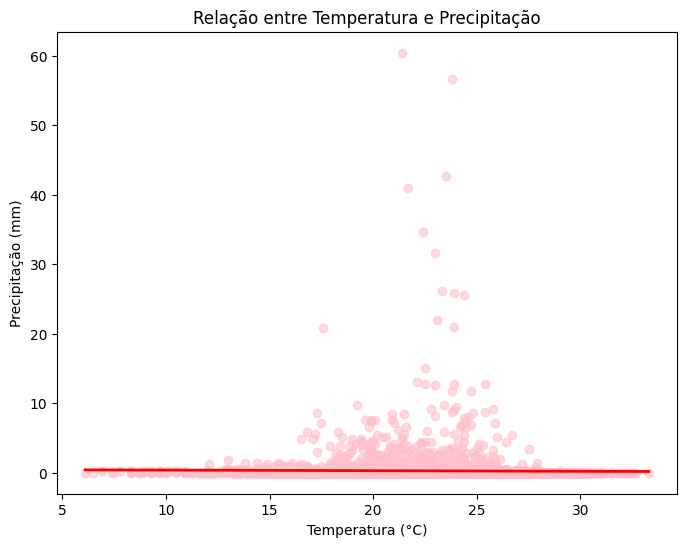

In [121]:
#--------------------------Scatter plot com linha de tendência (regressão linear)------------------------------------------

# Scatter plot e tamanho da figura
plt.figure(figsize=(8,6))
sns.regplot(x='T Inst', y='precip', data=df, 
            scatter_kws={'alpha':0.6, 'color':'pink'},
            line_kws={'color':'red', 'linewidth':2})

# Títulos e rótulos
plt.xlabel('Temperatura (°C)')
plt.ylabel('Precipitação (mm)')
plt.title('Relação entre Temperatura e Precipitação')

# Salvar figura
plt.savefig(r"C:\Users\seren\OneDrive\One_drive_serena\SERENA\01. MESTRADO\09. DISCIPLINAS MESTRADO\.UFSC\Python\python_env_app\Relação_temperatura_precipitação_Inha_tendencia.png",
            dpi=300, bbox_inches='tight')  # dpi=300 → alta resolução, bbox_inches='tight' → sem cortar

# Visualizar
plt.show()